<a href="https://colab.research.google.com/github/sharmashreya2002/Smile-Electronics/blob/main/Tech_For_The_Poorest_Billion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import gspread
import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd

# Open Google Spreadsheet
spreadsheet = gc.open('Copy of 20220912-18 SMILE all')

# Load the appropriate worksheet.
worksheet = spreadsheet.worksheet('20220912-18 In backpack 1')

# Get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(rows)

# Drop the first 2 rows and the first two columns.
df = df.drop(df.index[0:2])
df = df.drop([0], axis=1)
df = df.iloc[:-9]

# Name columns and reset index.
df = df.rename(columns={1: 'Hours', 2:'Timestamp', 3:'Ambiet temperature', 4:'Temperature in Backpack 1', 5:'Temperature in Backpack 2', 6:'Chamber 18 temperature', 7:'Chamber 12 temperature', 8:'Chamber 10 temperature', 9:'Chamber 9 temperature', 10:'Chamber 8 temperature', 11:'Chamber 6 temperature', 12:'Chamber 4 temperature', 13:'Chamber 3 temperature', 14: 'Chamber 2 temperature'})

# Show DataFrame.
df

,Hours,Timestamp,Ambiet temperature,Temperature in Backpack 1,Temperature in Backpack 2,Chamber 18 temperature,Chamber 12 temperature,Chamber 10 temperature,Chamber 9 temperature,Chamber 8 temperature,Chamber 6 temperature,Chamber 4 temperature,Chamber 3 temperature,Chamber 2 temperature
2,-0.1666666667,22-09-12 03:10:00 PM,24.558,24.444,24.447,17.058,16.838,16.784,16.936,16.684,16.923,16.924,17.15,17.003
3,-0.08333333333,22-09-12 03:15:00 PM,24.597,24.543,24.525,17.058,17.031,16.958,17.108,16.819,17,17.021,17.186,17.041
4,0,22-09-12 03:20:00 PM,24.617,24.523,24.506,17.077,17.05,16.997,17.165,16.858,17.02,17.041,17.204,17.041
5,0.08333333333,22-09-12 03:25:00 PM,24.617,24.641,24.624,17.058,17.089,17.036,17.127,16.819,17.058,17.021,17.186,17.022
6,0.1666666667,22-09-12 03:30:00 PM,24.48,24.74,24.663,16.734,16.799,16.707,16.821,16.53,16.691,16.651,16.858,16.713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,145.1666667,22-09-18 04:30:00 PM,21.431,,20.016,14.801,14.05,13.866,13.916,13.608,13.933,14.186,14.704,14.719
1747,145.25,22-09-18 04:35:00 PM,21.412,,19.996,14.858,14.05,13.866,13.916,13.608,13.933,14.206,14.724,14.739
1748,145.3333333,22-09-18 04:40:00 PM,21.412,,20.016,14.839,14.05,13.885,13.916,13.627,13.952,14.206,14.762,14.739
1749,145.4166667,22-09-18 04:45:00 PM,21.45,,20.035,14.877,14.109,13.905,13.955,13.647,13.972,14.225,14.762,14.758


In [ ]:
# Create a figure.
fig1 = go.Figure()

# Add a scatter plot trace for the measurements.
fig1.add_trace(go.Scatter(x=df['Hours'].astype('float64'), y=df['Chamber 8 temperature'].astype('float64'), mode='markers', name='Measurements'))

# Label the axes.
fig1.update_xaxes(title_text='Hours since Adding Icepack')
fig1.update_yaxes(title_text='Temperature in Chamber')

# Set the axis limits and ticks.
fig1.update_layout(xaxis=dict(range=[0,150]))
fig1.update_layout(yaxis=dict(range=[0,20]))
fig1.update_xaxes(tick0=0, dtick=2)
fig1.update_yaxes(tick0=0, dtick=1)



The first regression model used was a polynomial regression of degree 4. 

In [ ]:
# Perform polynomial Regression
coefficients = np.polyfit(x=df['Hours'].astype('float64'), y=df['Chamber 8 temperature'].astype('float64'), deg = 4)

## Convert df data to form more compatible with matplotlib
hours = df['Hours'].astype('float64').tolist()
measurements = df['Chamber 8 temperature'].astype('float64').tolist()
ambient = df['Ambiet temperature'].astype('float64').tolist()

## Function containing the regression model 
def regression(x, coeff):
  y = coeff[4] + coeff[3]*x + coeff[2]*x**2 + coeff[1]*x**3 + coeff[0]*x**4
  return y 

def trend_curve(time_points, coefficients):
  trend = []
  for x in time_points:
    trend.append(regression(x, coefficients))
  return(trend)

time_points = np.arange(0,150,0.01)
estimates = trend_curve(time_points, coefficients)

<function matplotlib.pyplot.show(close=None, block=None)>

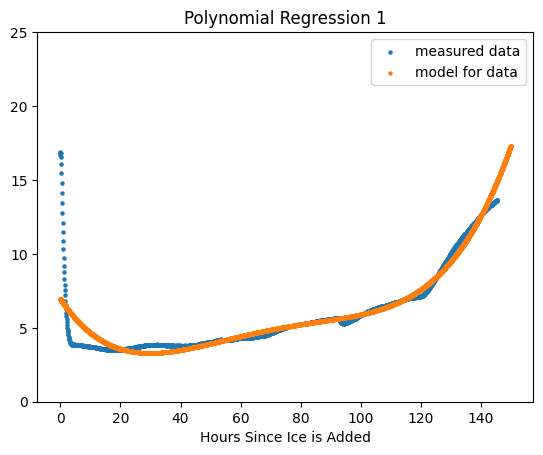

In [ ]:
# Plot the polynomial regression
plt.scatter(hours, measurements, s = 5, label = 'measured data')
plt.scatter(time_points, estimates, s= 5, label = 'model for data')
plt.ylim([0, 25])
plt.legend(loc="upper right")
plt.title('Polynomial Regression 1')
plt.xlabel('Hours Since Ice is Added')
plt.show

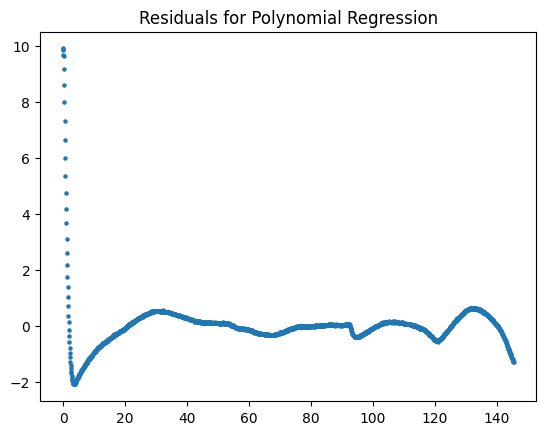

In [ ]:
## Plot residuals to add a periodic component to the model to account for the variation in night/ day temperatures 

def find_residuals(hours, measurements, coefficients):
  residuals = []
  for x, y in zip(hours, measurements):
    residuals.append(y - regression(x, coefficients))
  return residuals

resid = find_residuals(hours, measurements, coefficients)

plt.scatter(hours, resid, s = 5)
plt.title('Residuals for Polynomial Regression')
plt.show()

The initial drop in temperature from when the ice pack is added to when the temperature plateaus is skewing the model. The vaccines will likely not be added to the chamber until the temperature is in the safe operating regime; thus, it is worth exploring a truncated model that removes this section of the data. 

In [ ]:
def truncate_measurements(measurements, hours):
  counter = 0
  ## truncate from the beginning (truncate also the ambient temperature to be used later)
  for x, y in zip(measurements, hours):
    if x > 4:
      counter += 1
    else:
      break
  measurements_trunc = measurements[counter:]
  hours_trunc = hours[counter:]
  ambient_trunc = ambient[counter:]

  ## truncate from the end (truncate also the ambient temperature to be used later)
  total = np.shape(measurements_trunc)[0]
  counter_2 = 0
  for i in range(total):
    value = measurements_trunc[total-i-1]
    if value > 8:
      counter_2 += 1
    else:
      break
  measurements_trunc = measurements_trunc[0:total - counter_2]
  hours_trunc = hours_trunc[0:total - counter_2]
  ambient_trunc = ambient_trunc[0:total -  counter_2]
  return measurements_trunc, hours_trunc, ambient_trunc


trunc = truncate_measurements(measurements, hours)
measurements_trunc = trunc[0]
hours_trunc = trunc[1]
ambient_trunc = trunc[2]



<function matplotlib.pyplot.show(close=None, block=None)>

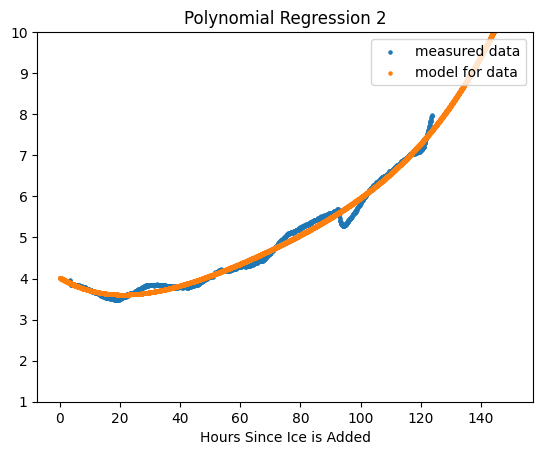

In [ ]:
# Perform polynomial Regression again
coefficients2 = np.polyfit(x=hours_trunc, y=measurements_trunc, deg = 4)
estimates2 = trend_curve(time_points, coefficients2)

# Plot the polynomial regression
plt.scatter(hours_trunc, measurements_trunc, s = 5, label = 'measured data')
plt.scatter(time_points, estimates2, s= 5, label = 'model for data')
plt.ylim([1, 10])
plt.legend(loc="upper right")
plt.title('Polynomial Regression 2')
plt.xlabel('Hours Since Ice is Added')
plt.show

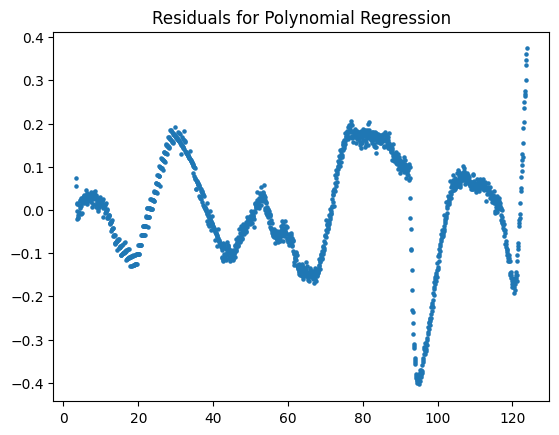

In [ ]:
resid2 = find_residuals(hours_trunc, measurements_trunc, coefficients2)

plt.scatter(hours_trunc, resid2, s = 5)
plt.title('Residuals for Polynomial Regression')
plt.show()

There is a periodicity to the residuals -- we can attempt to fit a sinusoidal model to the residuals. This next part of the code is coming from the exercises carried out in the IB Data Science Activity. We are fitting to the residuals a form as folllows:

β1ssin(ω1x)+β1ccos(ω1x)+β2ssin(ω2x)+β2ccos(ω2x)+…+βKssin(ωKx)+βKccos(ωKx).



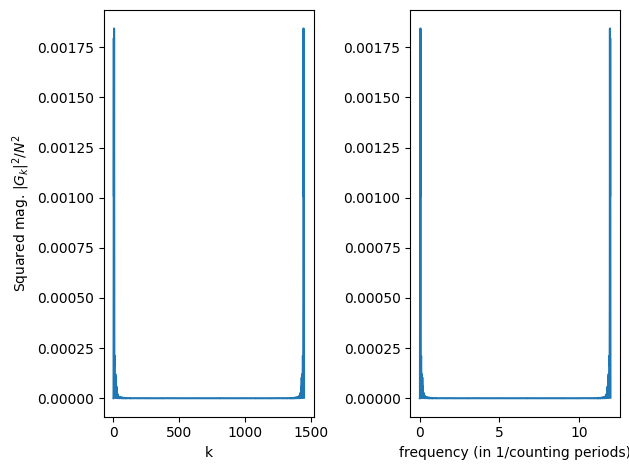

In [ ]:
import math 
N = np.size(hours_trunc)
T = hours_trunc[101] - hours_trunc[100] # T is in counting periods 

# Compute the squared magnitudes of the DFT coefficients -- this is known as the "periodogram"
pgram = np.abs(np.fft.fft(resid2, N)/N)**2 
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = indices/(N*T)
freqs_in_rads = freqs_in_hz*2*math.pi

plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_in_hz, pgram)
plt.xlabel('frequency (in 1/counting periods)')
plt.savefig('DFT_tube.pdf')
plt.tight_layout()


In [ ]:
top_inds = indices[(pgram > 0.5*np.max(pgram))]
top_freqs_hz = freqs_in_hz[(pgram > 0.5*np.max(pgram))]
print('Top indices:', top_inds, ' Top frequencies in Hz:', top_freqs_hz)

Top indices: [   3.    4.    5. 1442. 1443. 1444.]  Top frequencies in Hz: [ 0.02487906  0.03317208  0.0414651  11.95853538 11.9668284  11.97512142]


coefficients are as follows: [  318.09499773  -153.55337651  1744.36755964 -1913.97626773
 -1507.67211395  1689.93663757 -1508.15871227 -1689.83505615
  1744.67148955  1913.5492251    318.21517194   153.6270673 ]


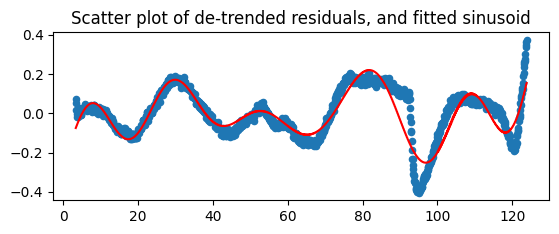

In [ ]:
#Six different frequencies, only include first three because of symmetry
w = []
for i in range(int(np.shape(top_inds)[0])):
  wnew = 2*math.pi*top_inds[i]/(N*T)
  w.append(wnew)

## transform to an array to allow the least squares analysis to proceed
hours_trunc_a = np.array(hours_trunc)

# each sinusoid is one column of X matrix
sinusoid = []
for i in range(int(np.shape(w)[0])):
  newsin = np.array(np.sin(w[i]*hours_trunc_a))
  newcos = np.array([np.cos(w[i]*hours_trunc_a)])
  sinusoid.append(newsin)
  sinusoid.append(newcos)

XT = np.vstack((sinusoid))
X = np.transpose(XT)

# find coefficients using Least Squares
beta_sc = np.linalg.inv(XT.dot(X)).dot(XT).dot(resid2)

print('coefficients are as follows:' , beta_sc)

fit_sc = X.dot(beta_sc)

plt.subplot(211)
plt.scatter(hours_trunc, resid2, s=20)
plt.plot(hours_trunc_a, fit_sc, 'r')
plt.title('Scatter plot of de-trended residuals, and fitted sinusoid')

plt.show()

resid_final = resid2 - fit_sc
SSE_final = np.linalg.norm(resid_final)**2
MSE_final = SSE_final/np.size(hours_trunc)


<function matplotlib.pyplot.show(close=None, block=None)>

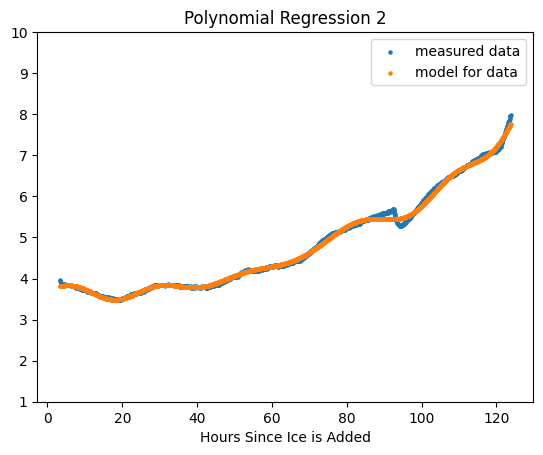

In [ ]:
general_trend = trend_curve(hours_trunc, coefficients2)
full_model = general_trend + fit_sc

# Plot the combined regression
plt.scatter(hours_trunc, measurements_trunc, s = 5, label = 'measured data')
plt.scatter(hours_trunc, full_model, s= 5, label = 'model for data')
plt.ylim([1, 10])
plt.legend(loc="upper right")
plt.title('Polynomial Regression 2')
plt.xlabel('Hours Since Ice is Added')
plt.show

Now, with this working model, we will find at each temperature the remaining cool life. By using a continuous model like this, we can interpolate for temperatures that might not have been captured by the discrete measurements taken. Hopefully, there will be a model to be extracted from this data transformation. 

The arduino measures temperature to the nearest 0.1 degree, and for a useful time estimation, we will give the remaining cool-life to the nearest hour. More precision is likely not to be accurate and robust. 

**Remaining Cool-Life Prediction:**


In [ ]:
times = np.arange(hours_trunc[0], hours_trunc[-1], 0.01)

print(times)

def model_prediction(beta_sc, w, coefficients, x):
  y_sin = 0
  for i in range(int(np.shape(w)[0])):
    ay_sin = y_sin + beta_sc[i]*np.sin(w[i]*x + beta_sc[i+1]*np.cos(w[i]*x))
  y_trend = regression(x, coefficients)
  return y_sin + y_trend

def mapping(times, beta_sc, w, coefficients):
  final_time = times[-1]
  cool_life_temp = []
  for x in times:
    ans = model_prediction(beta_sc, w, coefficients2, x)
    cool_life_temp.append((np.round(final_time - x,0), np.round(ans, 1)))
  
  cool_life_temp_no_dup = [*set(cool_life_temp)]
  return cool_life_temp_no_dup

ans = mapping(times, beta_sc, w, coefficients2)
print(ans)

[  3.33333333   3.34333333   3.35333333 ... 123.80333333 123.81333333
 123.82333333]
[(78.0, 4.0), (98.0, 3.6), (79.0, 3.9), (88.0, 3.8), (91.0, 3.7), (6.0, 7.1), (100.0, 3.6), (34.0, 5.4), (22.0, 6.1), (115.0, 3.7), (3.0, 7.3), (116.0, 3.8), (13.0, 6.6), (19.0, 6.3), (120.0, 3.9), (32.0, 5.5), (80.0, 3.9), (52.0, 4.7), (47.0, 4.9), (8.0, 6.9), (45.0, 5.0), (59.0, 4.5), (101.0, 3.6), (82.0, 3.9), (54.0, 4.7), (49.0, 4.9), (40.0, 5.2), (35.0, 5.4), (34.0, 5.5), (29.0, 5.7), (24.0, 5.9), (71.0, 4.1), (74.0, 4.0), (69.0, 4.2), (94.0, 3.7), (64.0, 4.4), (55.0, 4.6), (119.0, 3.8), (84.0, 3.8), (42.0, 5.2), (37.0, 5.4), (14.0, 6.6), (96.0, 3.6), (71.0, 4.2), (107.0, 3.6), (43.0, 5.1), (57.0, 4.6), (52.0, 4.8), (32.0, 5.6), (27.0, 5.8), (111.0, 3.7), (72.0, 4.1), (11.0, 6.8), (20.0, 6.1), (30.0, 5.7), (113.0, 3.7), (7.0, 7.0), (74.0, 4.1), (17.0, 6.3), (23.0, 6.0), (20.0, 6.2), (85.0, 3.8), (15.0, 6.4), (4.0, 7.2), (97.0, 3.6), (78.0, 3.9), (3.0, 7.4), (17.0, 6.4), (87.0, 3.8), (90.0, 3.7), (

<function matplotlib.pyplot.show(close=None, block=None)>

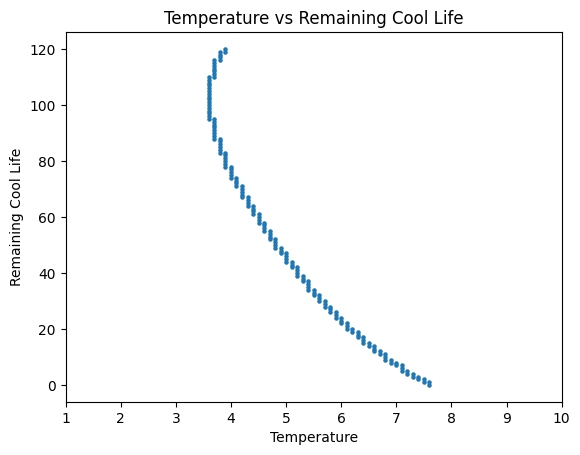

In [ ]:
time_remaining = []
temp = []
for element in ans:
## avoid divide by zero errors in the exponential regression in the next step by turning zero cool life remaining to a non zero, but small value
  if element[0]==0:
    time_remaining.append(0.0001)
    temp.append(element[1])
  else:
    time_remaining.append(element[0])
    temp.append(element[1])

# Plot 
plt.scatter(temp, time_remaining, s = 5)
plt.xlim([1, 10])
plt.title('Temperature vs Remaining Cool Life')
plt.xlabel('Temperature')
plt.ylabel('Remaining Cool Life')
plt.show

In [ ]:
fit_exp = np.polyfit(temp, np.log(time_remaining), 1)
print(fit_exp)

[-0.92979328  8.23898315]


To this data, let us fit an exponential regression curve. It appears the the initial predictions will not be accurate, but it is hard to be certain without visualizing the trend line. 

In [ ]:
def exp_reg(x, coeff):
  a = np.exp(coeff[1])
  b = np.exp(coeff[0])
  return a*(b**x)

temperatures = np.arange(2, 8, 0.1)
cool_life = []
for temperature in temperatures:
  cool_life.append(exp_reg(temperature, fit_exp))


<function matplotlib.pyplot.show(close=None, block=None)>

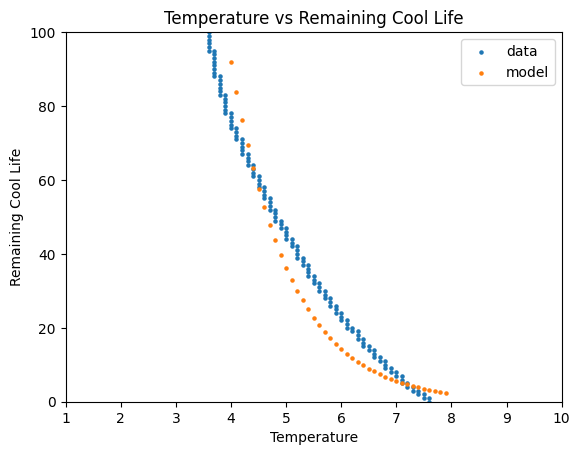

In [ ]:
# Plot 
plt.scatter(temp, time_remaining, s = 5, label = 'data')
plt.scatter(temperatures, cool_life, s = 5, label = 'model')
plt.xlim([1, 10])
plt.ylim([0,100])
plt.title('Temperature vs Remaining Cool Life')
plt.xlabel('Temperature')
plt.ylabel('Remaining Cool Life')
plt.legend()
plt.show

Here, the exponential does not seem to be accurately describing the data. We can try a linear fit to the data instead and also a polynomial to the third degree. 

<function matplotlib.pyplot.show(close=None, block=None)>

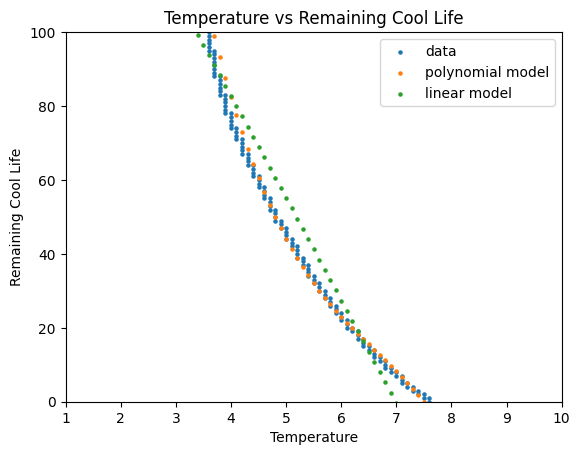

In [ ]:
fit_lin = np.polyfit(temp, time_remaining, 1)

fit_poly = np.polyfit(temp, time_remaining, 3)

def linear_reg(x, coeff):
  return coeff[0]*x + coeff[1]

def poly_fit_reg(x, coeff):
  y = coeff[0]*x**3 + (coeff[1])*x**2 + coeff[2]*x + coeff[3]
  return y

cool_life_lin = []
cool_life_poly = []
for temperature in temperatures:
  cool_life_lin.append(linear_reg(temperature, fit_lin))
  cool_life_poly.append(poly_fit_reg(temperature, fit_poly))


# Plot 
plt.scatter(temp, time_remaining, s = 5, label = 'data')
plt.scatter(temperatures, cool_life_poly, s = 5, label = 'polynomial model')
plt.scatter(temperatures, cool_life_lin, s = 5, label = 'linear model')
plt.xlim([1, 10])
plt.ylim([0,100])
plt.title('Temperature vs Remaining Cool Life')
plt.xlabel('Temperature')
plt.ylabel('Remaining Cool Life')
plt.legend()
plt.show

A third-degree polynomnial describes the data best.

<function matplotlib.pyplot.show(close=None, block=None)>

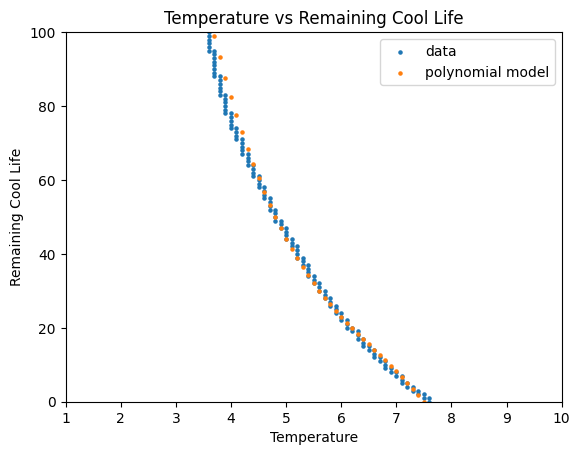

In [ ]:
# Plot 
plt.scatter(temp, time_remaining, s = 5, label = 'data')
plt.scatter(temperatures, cool_life_poly, s = 5, label = 'polynomial model')
plt.xlim([1, 10])
plt.ylim([0,100])
plt.title('Temperature vs Remaining Cool Life')
plt.xlabel('Temperature')
plt.ylabel('Remaining Cool Life')
plt.legend()
plt.show

Create a dictionary of mappings, each temperature associated with a time found from the previous model. Accurate from cool life remaining of 100 hours or less, only. 

In [ ]:
final_list = []
for temperature, time in zip(temperatures, cool_life_poly):
  if time < 100:
    y = (np.round(temperature,1), np.round(time,2))
    final_list.append(y)
print(final_list)

final_dict = dict(final_list)
print(final_dict)


[(3.7, 99.01), (3.8, 93.2), (3.9, 87.7), (4.0, 82.49), (4.1, 77.56), (4.2, 72.9), (4.3, 68.5), (4.4, 64.35), (4.5, 60.44), (4.6, 56.75), (4.7, 53.28), (4.8, 50.02), (4.9, 46.96), (5.0, 44.07), (5.1, 41.36), (5.2, 38.81), (5.3, 36.42), (5.4, 34.16), (5.5, 32.03), (5.6, 30.03), (5.7, 28.13), (5.8, 26.32), (5.9, 24.61), (6.0, 22.96), (6.1, 21.39), (6.2, 19.86), (6.3, 18.38), (6.4, 16.94), (6.5, 15.51), (6.6, 14.09), (6.7, 12.67), (6.8, 11.24), (6.9, 9.79), (7.0, 8.31), (7.1, 6.78), (7.2, 5.2), (7.3, 3.55), (7.4, 1.82), (7.5, 0.01), (7.6, -1.91), (7.7, -3.93), (7.8, -6.07), (7.9, -8.34)]
{3.7: 99.01, 3.8: 93.2, 3.9: 87.7, 4.0: 82.49, 4.1: 77.56, 4.2: 72.9, 4.3: 68.5, 4.4: 64.35, 4.5: 60.44, 4.6: 56.75, 4.7: 53.28, 4.8: 50.02, 4.9: 46.96, 5.0: 44.07, 5.1: 41.36, 5.2: 38.81, 5.3: 36.42, 5.4: 34.16, 5.5: 32.03, 5.6: 30.03, 5.7: 28.13, 5.8: 26.32, 5.9: 24.61, 6.0: 22.96, 6.1: 21.39, 6.2: 19.86, 6.3: 18.38, 6.4: 16.94, 6.5: 15.51, 6.6: 14.09, 6.7: 12.67, 6.8: 11.24, 6.9: 9.79, 7.0: 8.31, 7.1: 6

This is a point estimate. This will not work for different ambient temperatures, most likely. Unless you train the model for that ambient temperature first. This means that this analysis will not extend. How can we propose changes? 

https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html

Use the data from each of the chambers to validate against this model? But they're at the same ambient temperature, so that wouldn't test the model validity against different ambient temperatures. 

Can we extend using 1D heat transfer theory?

Let us find the relationship between the temperature difference (ambient temperature and chamber temperature) and remaining cool life.

<function matplotlib.pyplot.show(close=None, block=None)>

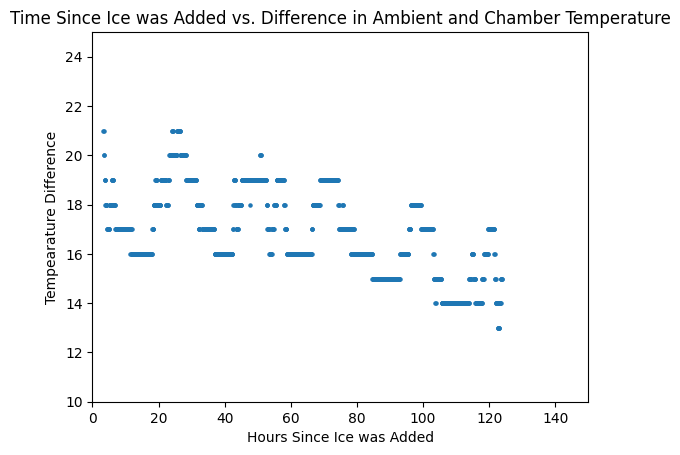

In [ ]:
## create list of ambient temperatures, recall relevant lists that are needed are measurements_trunc and hours_trunc and ambient_trunc
diff = []
for m, h, a in zip(measurements_trunc, hours_trunc, ambient_trunc):
  diff.append(np.round(a - m))

# Plot 
plt.scatter(hours_trunc, diff, s = 5, label = 'data')
plt.xlim([0, 150])
plt.ylim([10,25])
plt.title('Time Since Ice was Added vs. Difference in Ambient and Chamber Temperature')
plt.xlabel('Hours Since Ice was Added')
plt.ylabel('Tempearature Difference')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

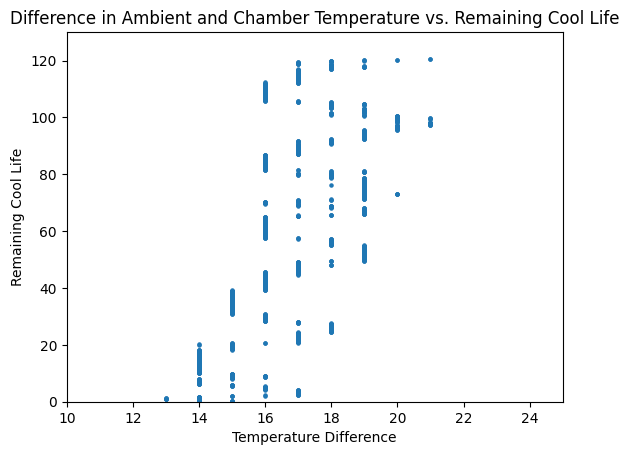

In [ ]:
final_time = hours_trunc[-1]
remaining_cool_life = []
for hour in hours_trunc:
  remaining_cool_life.append(np.round(final_time - hour,2))

# Plot 
plt.scatter(diff, remaining_cool_life, s = 5, label = 'data')
plt.xlim([10, 25])
plt.ylim([0,130])
plt.title('Difference in Ambient and Chamber Temperature vs. Remaining Cool Life')
plt.xlabel('Temperature Difference')
plt.ylabel('Remaining Cool Life')
plt.show

There is no feasible model to describe this relationship. The next two approaches are as follows:


1.   Propose a Bayesian Polynomial Regression outline to which different ambient temperature field trial data can be added and it can give an estimate for the parameters that describe a more robust model. 
2.   Consult heat transfer techniques -- assume steady 1D heat transfer, even though this is not very realistic -- and see how it compares to this model. 

But first, we also need to test the validitiy of our point estimate to the remaining chambers. Does this model extend? Or is it overfitted to a singular chamber? Our validity check follows: 

we will first compare our model predictions to chamber 8 data from where the model has come from. Then, we will use the warmest chamber, chamber 18, and see if our algorithm works.

The first thing we notice, is that for chamber 18, the temperature never goes below 4 degrees, so our truncate_measurements function will need to be changed. 

Then, we will compare the cool-life predictions from the model created using chamber 8 data to the worst-case scenario. 


<function matplotlib.pyplot.show(close=None, block=None)>

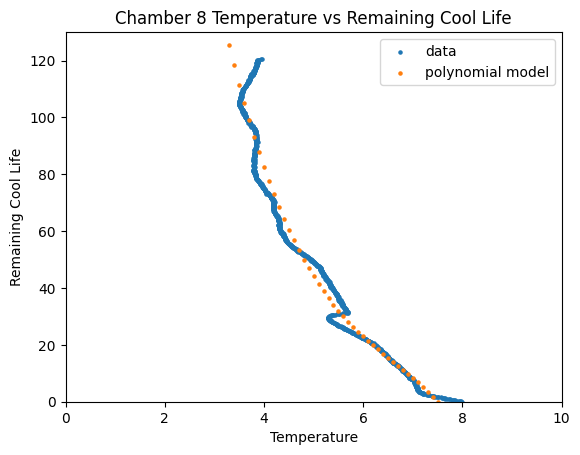

In [ ]:
chamber_8_measurements = df['Chamber 8 temperature'].astype('float64').tolist()

chamber_8_measurements_trunc = truncate_measurements(chamber_8_measurements, hours)[0]
chamber_8_hours_trunc = truncate_measurements(chamber_8_measurements, hours)[1]
final_8 = chamber_8_hours_trunc[-1]

chamber_8_cool_life = []
for time in chamber_8_hours_trunc:
  chamber_8_cool_life.append(np.round(final_8 - time, 2))

# Plot 
plt.scatter(chamber_8_measurements_trunc, chamber_8_cool_life, s = 5, label = 'data')
plt.scatter(temperatures, cool_life_poly, s = 5, label = 'polynomial model')
plt.xlim([0, 10])
plt.ylim([0,130])
plt.title('Chamber 8 Temperature vs Remaining Cool Life')
plt.xlabel('Temperature')
plt.ylabel('Remaining Cool Life')
plt.legend()
plt.show


As expected, the model follows closely, provided there is a margin of error added to the remaining cool life predictions.

<function matplotlib.pyplot.show(close=None, block=None)>

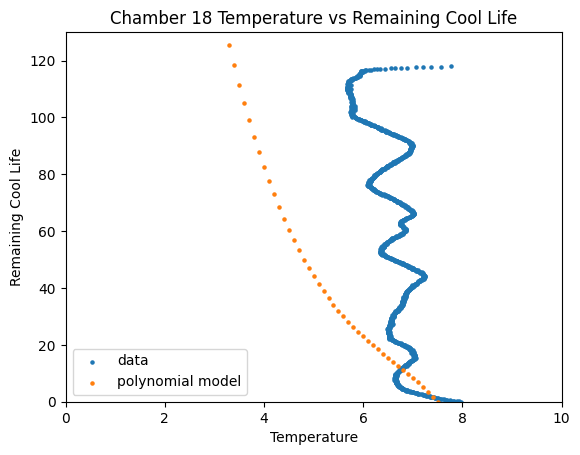

In [ ]:
chamber_18_measurements = df['Chamber 18 temperature'].astype('float64').tolist()

def truncate_measurements2(measurements, hours):
  counter = 0
  ## truncate from the beginning (truncate also the ambient temperature to be used later)
  for x, y in zip(measurements, hours):
    if x > 8:
      counter += 1
    else:
      break
  measurements_trunc = measurements[counter:]
  hours_trunc = hours[counter:]
  ambient_trunc = ambient[counter:]

  ## truncate from the end (truncate also the ambient temperature to be used later)
  total = np.shape(measurements_trunc)[0]
  counter_2 = 0
  for i in range(total):
    value = measurements_trunc[total-i-1]
    if value > 8:
      counter_2 += 1
    else:
      break
  measurements_trunc = measurements_trunc[0:total - counter_2]
  hours_trunc = hours_trunc[0:total - counter_2]
  ambient_trunc = ambient_trunc[0:total -  counter_2]
  return measurements_trunc, hours_trunc, ambient_trunc


chamber_18_measurements_trunc = truncate_measurements2(chamber_18_measurements, hours)[0]
chamber_18_hours_trunc = truncate_measurements2(chamber_18_measurements, hours)[1]
final_18 = chamber_18_hours_trunc[-1]

chamber_18_cool_life = []
for time in chamber_18_hours_trunc:
  chamber_18_cool_life.append(np.round(final_18 - time, 2))

# Plot 
plt.scatter(chamber_18_measurements_trunc, chamber_18_cool_life, s = 5, label = 'data')
plt.scatter(temperatures, cool_life_poly, s = 5, label = 'polynomial model')
plt.xlim([0, 10])
plt.ylim([0,130])
plt.title('Chamber 18 Temperature vs Remaining Cool Life')
plt.xlabel('Temperature')
plt.ylabel('Remaining Cool Life')
plt.legend()
plt.show


The model is not at all accurate. The shape  is not remotely similar. This approach will not work. Plotting the curves for chamber 8 and 18 on the same plot indicates that there is no way for the same model/ algorithm to be accurate for both. 

<function matplotlib.pyplot.show(close=None, block=None)>

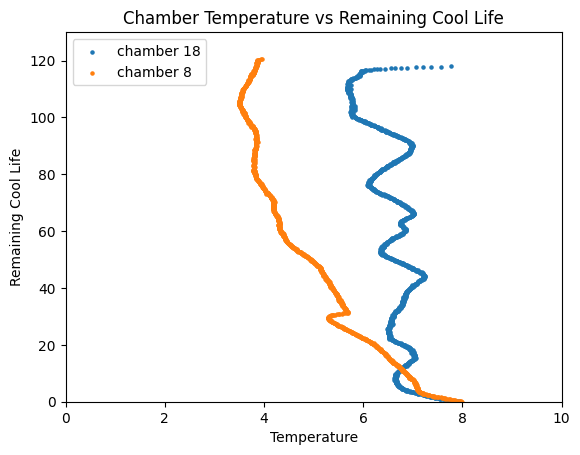

In [ ]:
# Plot 
plt.scatter(chamber_18_measurements_trunc, chamber_18_cool_life, s = 5, label = 'chamber 18')
plt.scatter(chamber_8_measurements_trunc, chamber_8_cool_life, s = 5, label = 'chamber 8')
plt.xlim([0, 10])
plt.ylim([0,130])
plt.title('Chamber Temperature vs Remaining Cool Life')
plt.xlabel('Temperature')
plt.ylabel('Remaining Cool Life')
plt.legend()
plt.show

In [ ]:
## remaining chambers

chamber_12_measurements = df['Chamber 12 temperature'].astype('float64').tolist()
chamber_12_measurements_trunc = truncate_measurements2(chamber_12_measurements, hours)[0]
chamber_12_hours_trunc = truncate_measurements2(chamber_12_measurements, hours)[1]
final_12 = chamber_12_hours_trunc[-1]
chamber_12_cool_life = []
for time in chamber_12_hours_trunc:
  chamber_12_cool_life.append(np.round(final_12 - time, 2))

chamber_10_measurements = df['Chamber 10 temperature'].astype('float64').tolist()
chamber_10_measurements_trunc = truncate_measurements2(chamber_10_measurements, hours)[0]
chamber_10_hours_trunc = truncate_measurements2(chamber_10_measurements, hours)[1]
final_10 = chamber_10_hours_trunc[-1]
chamber_10_cool_life = []
for time in chamber_10_hours_trunc:
  chamber_10_cool_life.append(np.round(final_10 - time, 2))

chamber_9_measurements = df['Chamber 9 temperature'].astype('float64').tolist()
chamber_9_measurements_trunc = truncate_measurements2(chamber_9_measurements, hours)[0]
chamber_9_hours_trunc = truncate_measurements2(chamber_9_measurements, hours)[1]
final_9 = chamber_9_hours_trunc[-1]
chamber_9_cool_life = []
for time in chamber_9_hours_trunc:
  chamber_9_cool_life.append(np.round(final_9 - time, 2))

chamber_6_measurements = df['Chamber 6 temperature'].astype('float64').tolist()
chamber_6_measurements_trunc = truncate_measurements2(chamber_6_measurements, hours)[0]
chamber_6_hours_trunc = truncate_measurements2(chamber_6_measurements, hours)[1]
final_6 = chamber_6_hours_trunc[-1]
chamber_6_cool_life = []
for time in chamber_6_hours_trunc:
  chamber_6_cool_life.append(np.round(final_6 - time, 2))

chamber_4_measurements = df['Chamber 4 temperature'].astype('float64').tolist()
chamber_4_measurements_trunc = truncate_measurements2(chamber_4_measurements, hours)[0]
chamber_4_hours_trunc = truncate_measurements2(chamber_4_measurements, hours)[1]
final_4 = chamber_4_hours_trunc[-1]
chamber_4_cool_life = []
for time in chamber_4_hours_trunc:
  chamber_4_cool_life.append(np.round(final_4 - time, 2))

chamber_3_measurements = df['Chamber 3 temperature'].astype('float64').tolist()
chamber_3_measurements_trunc = truncate_measurements2(chamber_3_measurements, hours)[0]
chamber_3_hours_trunc = truncate_measurements2(chamber_3_measurements, hours)[1]
final_3 = chamber_3_hours_trunc[-1]
chamber_3_cool_life = []
for time in chamber_3_hours_trunc:
  chamber_3_cool_life.append(np.round(final_3 - time, 2))

chamber_2_measurements = df['Chamber 2 temperature'].astype('float64').tolist()
chamber_2_measurements_trunc = truncate_measurements2(chamber_2_measurements, hours)[0]
chamber_2_hours_trunc = truncate_measurements2(chamber_2_measurements, hours)[1]
final_2 = chamber_2_hours_trunc[-1]
chamber_2_cool_life = []
for time in chamber_2_hours_trunc:
  chamber_2_cool_life.append(np.round(final_2 - time, 2))



<function matplotlib.pyplot.show(close=None, block=None)>

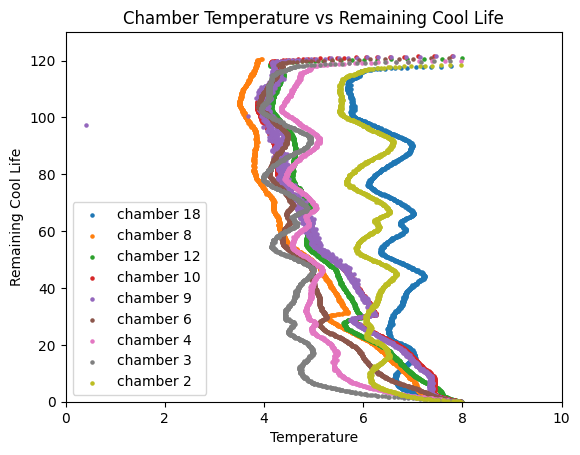

In [ ]:
# Plot 
plt.scatter(chamber_18_measurements_trunc, chamber_18_cool_life, s = 5, label = 'chamber 18')
plt.scatter(chamber_8_measurements_trunc, chamber_8_cool_life, s = 5, label = 'chamber 8')
plt.scatter(chamber_12_measurements_trunc, chamber_12_cool_life, s = 5, label = 'chamber 12')
plt.scatter(chamber_10_measurements_trunc, chamber_10_cool_life, s = 5, label = 'chamber 10')
plt.scatter(chamber_9_measurements_trunc, chamber_9_cool_life, s = 5, label = 'chamber 9')
plt.scatter(chamber_6_measurements_trunc, chamber_6_cool_life, s = 5, label = 'chamber 6')
plt.scatter(chamber_4_measurements_trunc, chamber_4_cool_life, s = 5, label = 'chamber 4')
plt.scatter(chamber_3_measurements_trunc, chamber_3_cool_life, s = 5, label = 'chamber 3')
plt.scatter(chamber_2_measurements_trunc, chamber_2_cool_life, s = 5, label = 'chamber 2')
plt.xlim([0, 10])
plt.ylim([0,130])
plt.title('Chamber Temperature vs Remaining Cool Life')
plt.xlabel('Temperature')
plt.ylabel('Remaining Cool Life')
plt.legend()
plt.show